In [1]:
#@title 🤗 AutoTrain DreamBooth
#@markdown In order to use this colab
#@markdown - upload images to a folder named `images/`
#@markdown - choose a project name if you wish
#@markdown - change model if you wish, you can also select sd2/2.1 or sd1.5
#@markdown - update prompt and remember it. choose keywords that don't usually appear in dictionaries
#@markdown - add huggingface information (token and repo_id) if you wish to push trained model to huggingface hub
#@markdown - update hyperparameters if you wish
#@markdown - click `Runtime > Run all` or run each cell individually
#@markdown - report issues / feature requests here: https://github.com/huggingface/autotrain-advanced/issues

import os
!pip install -U autotrain-advanced  --use-deprecated=legacy-resolver > install_logs.txt

In [2]:
#@markdown ---
#@markdown #### Project Config
project_name = 'ViratKholi' # @param {type:"string"}
model_name = 'stabilityai/stable-diffusion-xl-base-1.0' # @param ["stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1", "stabilityai/stable-diffusion-2-1-base"]
prompt = 'photo of ViratKholi person' # @param {type: "string"}

#@markdown ---
#@markdown #### Push to Hub?
#@markdown Use these only if you want to push your trained model to a private repo in your Hugging Face Account
#@markdown If you dont use these, the model will be saved in Google Colab and you are required to download it manually.
#@markdown Please enter your Hugging Face write token. The trained model will be saved to your Hugging Face account.
#@markdown You can find your token here: https://huggingface.co/settings/tokens
push_to_hub = True # @param ["False", "True"] {type:"raw"}
hf_token = "" #@param {type:"string"}
repo_id = "KarAshutosh/ViratKholi" #@param {type:"string"}

#@markdown ---
#@markdown #### Hyperparameters
learning_rate = 1e-4 # @param {type:"number"}
num_steps = 200 #@param {type:"number"}
batch_size = 1 # @param {type:"slider", min:1, max:32, step:1}
gradient_accumulation = 4 # @param {type:"slider", min:1, max:32, step:1}
resolution = 512 # @param {type:"slider", min:128, max:1024, step:128}
use_8bit_adam = False # @param ["False", "True"] {type:"raw"}
use_xformers = False # @param ["False", "True"] {type:"raw"}
use_fp16 = True # @param ["False", "True"] {type:"raw"}
train_text_encoder = False # @param ["False", "True"] {type:"raw"}
disable_gradient_checkpointing = False # @param ["False", "True"] {type:"raw"}

os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name
os.environ["PROMPT"] = prompt
os.environ["PUSH_TO_HUB"] = str(push_to_hub)
os.environ["HF_TOKEN"] = hf_token
os.environ["REPO_ID"] = repo_id
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_STEPS"] = str(num_steps)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["RESOLUTION"] = str(resolution)
os.environ["USE_8BIT_ADAM"] = str(use_8bit_adam)
os.environ["USE_XFORMERS"] = str(use_xformers)
os.environ["USE_FP16"] = str(use_fp16)
os.environ["TRAIN_TEXT_ENCODER"] = str(train_text_encoder)
os.environ["DISABLE_GRADIENT_CHECKPOINTING"] = str(disable_gradient_checkpointing)

In [3]:
!autotrain dreambooth \
--model ${MODEL_NAME} \
--project-name ${PROJECT_NAME} \
--image-path images/ \
--prompt "${PROMPT}" \
--resolution ${RESOLUTION} \
--batch-size ${BATCH_SIZE} \
--num-steps ${NUM_STEPS} \
--gradient-accumulation ${GRADIENT_ACCUMULATION} \
--lr ${LEARNING_RATE} \
$( [[ "$USE_FP16" == "True" ]] && echo "--fp16" ) \
$( [[ "$USE_XFORMERS" == "True" ]] && echo "--xformers" ) \
$( [[ "$TRAIN_TEXT_ENCODER" == "True" ]] && echo "--train-text-encoder" ) \
$( [[ "$USE_8BIT_ADAM" == "True" ]] && echo "--use-8bit-adam" ) \
$( [[ "$DISABLE_GRADIENT_CHECKPOINTING" == "True" ]] && echo "--disable_gradient-checkpointing" ) \
$( [[ "$PUSH_TO_HUB" == "True" ]] && echo "--push-to-hub --token ${HF_TOKEN} --repo-id ${REPO_ID}" )

> INFO    Namespace(version=False, revision=None, tokenizer=None, image_path='images/', class_image_path=None, prompt='photo of ViratKholi person', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, resolution=512, center_crop=None, train_text_encoder=None, sample_batch_size=4, num_steps=200, checkpointing_steps=100000, resume_from_checkpoint=None, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=None, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xformers=None, pre_compute_text_embeddings=None, tokenizer_max_length=None, text_encoder_use_attention_mask=None, rank=4, xl=None, fp16=True, bf16=None, validation_prompt=None, num_validation_images=4, validation_epochs=50, checkpoints_total_limit=None, validation_images=None, logging=None

In [10]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image

prj_path = "KarAshutosh/ViratKholi"
model = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)
pipe.to("cuda")
pipe.load_lora_weights(prj_path, weight_name="pytorch_lora_weights.safetensors")

torch.cuda.empty_cache()

prompt = "photo of ViratKholi in a suit"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

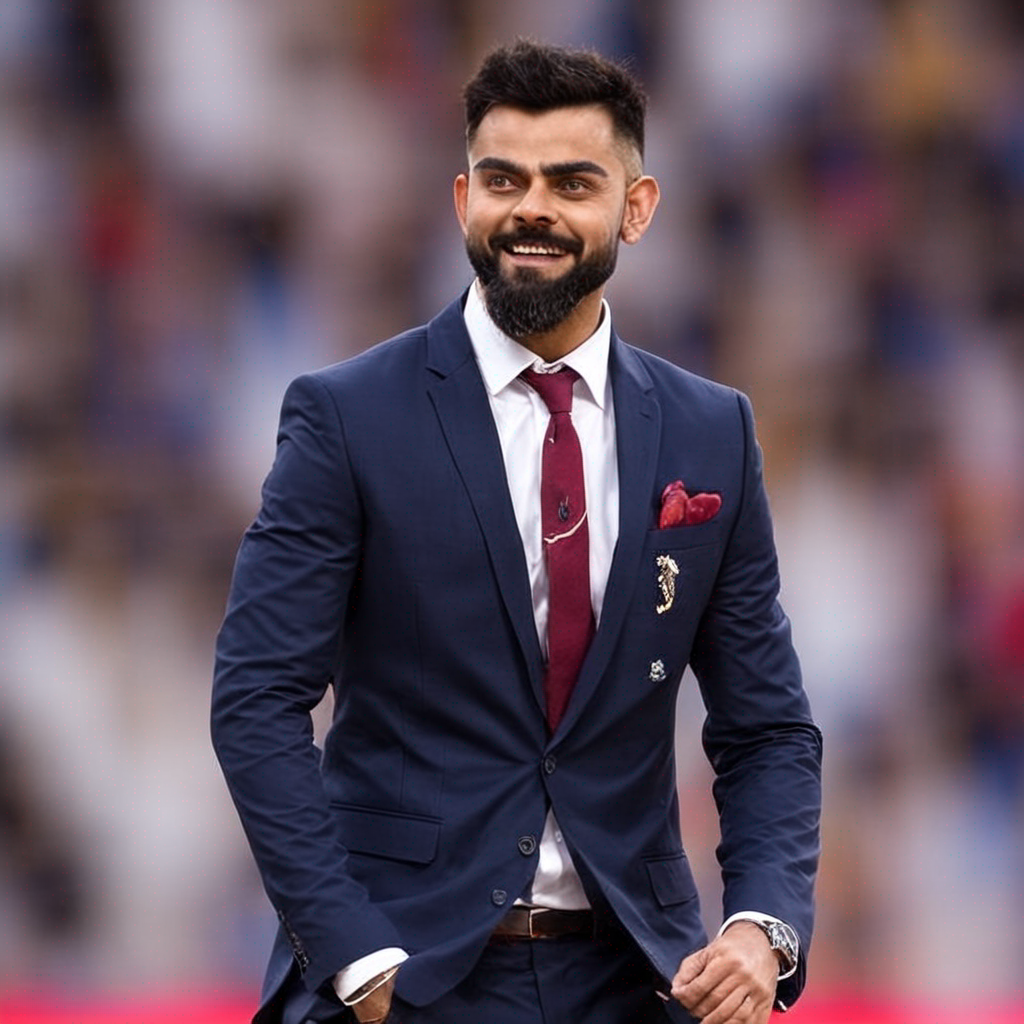

In [11]:
from IPython.display import display

display(image)
image.save("image_file_name.png")